In [1]:
#Importing necessary libaries

from scipy.spatial import Voronoi, voronoi_plot_2d
import pandas as pd
from keplergl import KeplerGl 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#importing the dataset

df = pd.read_csv('Indian_earthquake_data.csv')
df.head()

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India"
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India"
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India"
3,2021-07-30 13:56:31 IST,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana"
4,2021-07-30 07:19:38 IST,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan"


In [3]:
#preprocessing dataset

df['Origin Time'] = pd.to_datetime(df['Origin Time'])
df['Place'] = df.apply(lambda x: x['Location'].split(',')[1], axis=1)
df.head()

C:\Users\vishw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,Origin Time,Latitude,Longitude,Depth,Magnitude,Location,Place
0,2021-07-31 09:43:23,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India",India
1,2021-07-30 23:04:57,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India",Maharashtra
2,2021-07-30 21:31:10,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India",Punjab
3,2021-07-30 13:56:31,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana",Haryana
4,2021-07-30 07:19:38,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan",Bhutan


In [4]:
#Visualizing with Kepler.gl
map_1 = KeplerGl(height=600)
map_1.add_data(data=df, name='Indian Earthquake Visualization')
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Indian Earthquake Visualization': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

array([' A & N island', ' Arunachal Pradesh', ' Assam', ' Bhutan',
       ' Bihar', ' Chandigarh', ' Chhattisgarh', ' Gujarat', ' Haryana',
       ' Himachal Pradesh', ' Jammu & Kashmir', ' Jharkhand',
       ' Karnataka', ' Kerala', ' Laddakh', ' Lakshsdweep Island',
       ' Madhya Pradesh', ' Manipur', ' Meghalaya', ' Mizoram',
       ' Nagaland', ' Odisha', ' Punjab', ' Rajasthan', ' Sikkim',
       ' Tamil Nadu', ' Telangana', ' Tripura', ' Uttar Pradesh',
       ' Uttarakhand '], dtype=object)

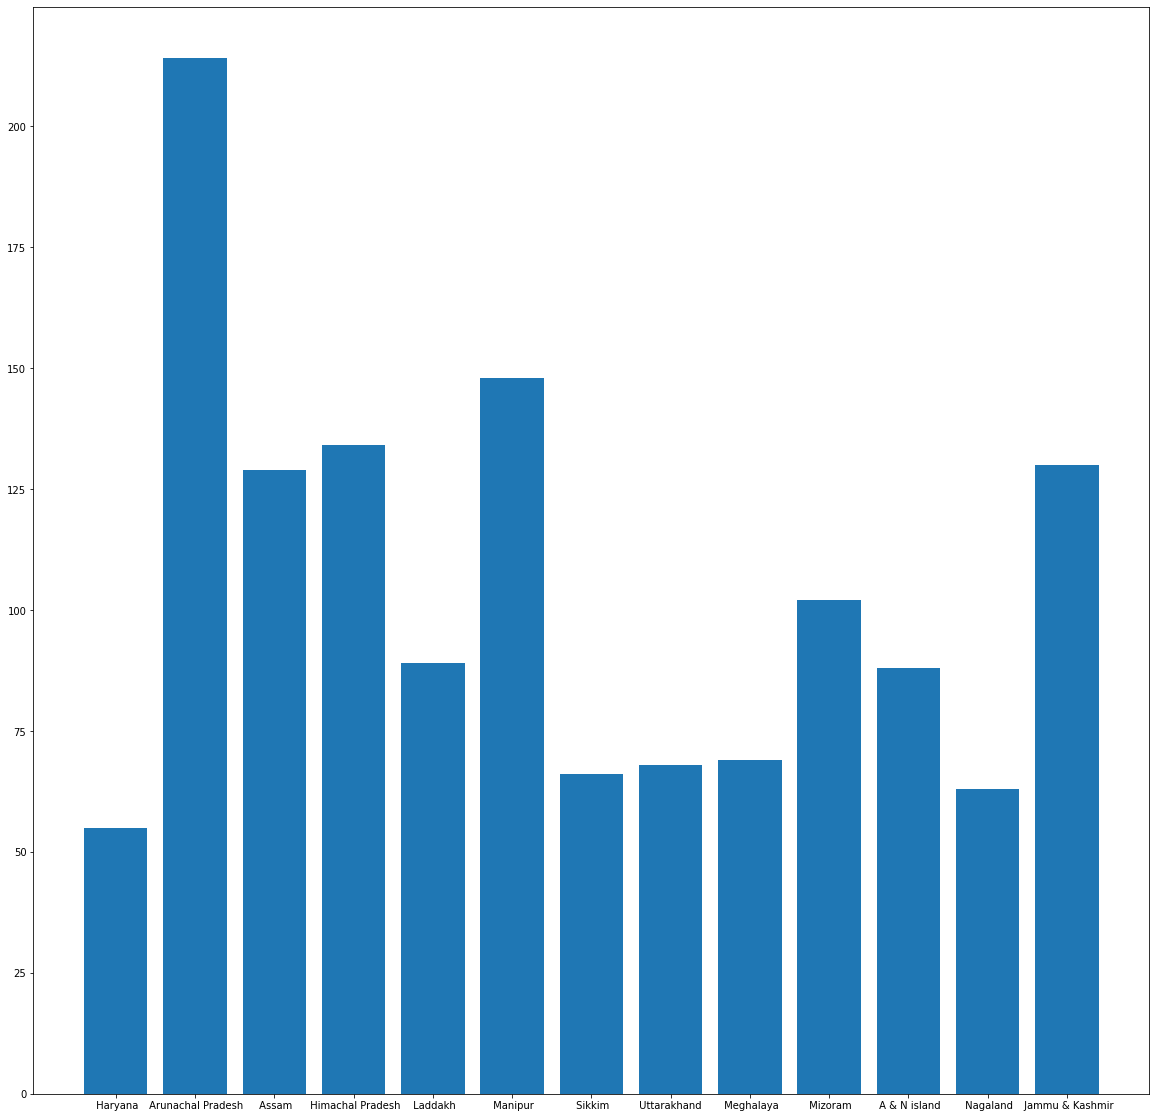

In [5]:
values = []
size = []
indices = []

df.replace(to_replace=" Andaman and Nicobar island", value=" A & N island",inplace=True)
df.replace(to_replace="Maharashtra", value=" Maharashtra",inplace=True)
df.replace(to_replace=" Jammu and Kashmir", value=" Jammu & Kashmir",inplace=True)
df.replace(to_replace="Jammu & Kashmir", value=" Jammu & Kashmir",inplace=True)
df.replace(to_replace=" Uttarakhand", value=" Uttarakhand ",inplace=True)
df.replace(to_replace="Mizoram", value=" Mizoram",inplace=True)




df=df.query("Place != [' India',' Malaysia',' Sri Lanka', ' Afghanistan',' Bangladesh',' Myanmar',' Uzbekistan','Myanmar',' Tajikistan',' Pakistan',' Nepal',' Mongolia',' Kyrgyzstan',' Oman',' Turkmenistan','West Bengal',' West Bengal']")
df


unique = df["Place"].unique()
unique = np.delete(unique,0)
ulist = unique.tolist()

for _,u in enumerate(unique):
    values.append(df[df['Place'].str.contains(u)])
    if(len(values[_]) > 50):
        size.append(len(values[_]))
    else:
        ulist.remove(u)
    
plt.figure(figsize = (20,20))
plt.bar(ulist,size)
# ulist
unique.sort()
unique

In [6]:
f1 = df['Latitude']
f2 = df['Longitude']
X = np.array(list(zip(f2,f1)))

In [7]:
X

array([[72.92, 19.93],
       [74.37, 31.5 ],
       [76.23, 28.34],
       ...,
       [94.3 , 24.7 ],
       [94.2 , 24.6 ],
       [92.9 , 14.5 ]])

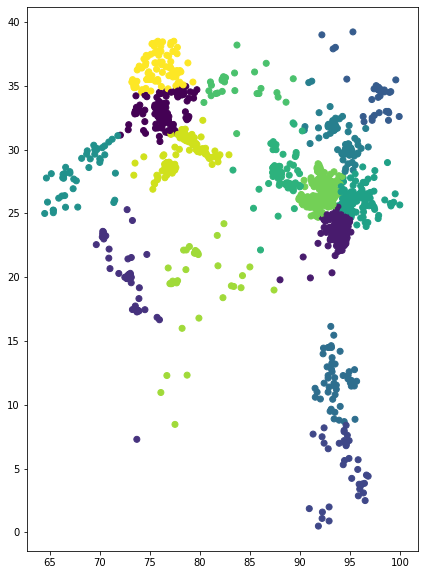

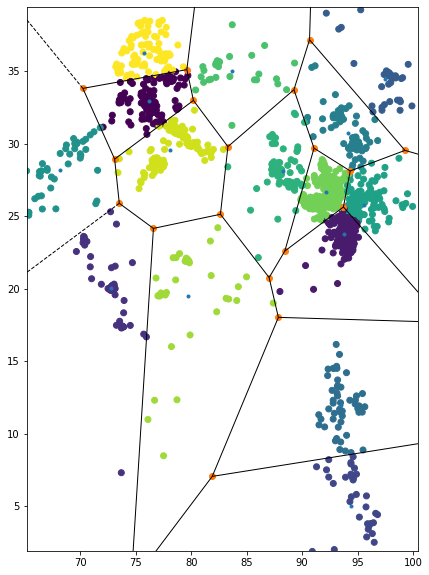

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(15).fit(X)
centers=kmeans.cluster_centers_
labels = kmeans.predict(X)
plt.figure(figsize = (7,10))
plt.scatter(f2,f1,c = labels)
plt.show()

plt.figure(figsize = (7,10))
plt.scatter(f2,f1,c = labels)
vor = Voronoi(centers)
fig = voronoi_plot_2d(vor,plt.gca())


plt.show()

In [15]:
# df.to_csv('transfer.csv', sep=',')

In [9]:
df['color'] = labels
# df.sort_values("color")


df = df.sort_values("color")

df

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location,Place,color
1831,2020-05-03 07:49:36,32.50,78.80,10.0,3.4,"25km SW of Hanley, Jammu & Kashmir, India",Jammu & Kashmir,0
2064,2020-03-24 20:07:47,32.90,73.60,22.0,3.4,"84km SW of Rajouri, Jammu and Kashmir",Jammu & Kashmir,0
561,2021-03-06 05:11:33,34.53,79.04,10.0,3.6,"140km ENE of Leh, Laddakh, India",Laddakh,0
2049,2020-03-27 16:06:48,32.73,76.23,3.0,2.9,"57km N of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0
2048,2020-03-27 16:21:13,32.74,76.20,5.0,2.9,"59km NNW of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0
...,...,...,...,...,...,...,...,...
1553,2020-07-06 07:28:59,38.02,77.75,150.0,4.2,"411km NNE of Kargil, Laddakh, India",Laddakh,14
703,2021-01-27 00:48:15,35.36,73.71,16.0,3.6,"158km NNW of Gulmarg, Jammu and Kashmir, India",Jammu & Kashmir,14
1547,2020-07-07 01:33:03,37.52,77.72,100.0,4.0,"359km NNE of Kargil, Laddakh, India",Laddakh,14
1595,2020-06-26 20:15:11,36.00,74.82,25.0,4.5,"200km NW of Kargil, Laddakh, India",Laddakh,14


In [10]:
# df.iloc[0][4]

In [11]:
list = []
freq = [] 
sum = 0
count = 0
for i in range(1,len(df['color'])):
    if(df.iloc[i][7] == df.iloc[i-1][7]):
#         sum += df.iloc[i][4]
        count += 1
    else:
#         sum += df.iloc[i][4]
        count += 1
#         list.append(sum/count)
        freq.append(count)
        sum = 0
        count = 0

In [12]:
freq

[239, 211, 143, 37, 36, 51, 69, 46, 146, 76, 29, 281, 37, 138]

<BarContainer object of 14 artists>

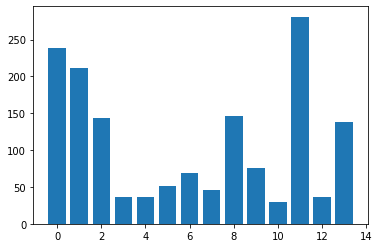

In [13]:
plt.bar(range(len(freq)),freq)

In [17]:
newData =  pd.read_csv('transfer.csv')
newData.head(5)

,Unnamed: 0,Origin Time,Latitude,Longitude,Depth,Magnitude,Location,Place,color
0,1831,2020-05-03 07:49:36,32.50,78.80,10.0,3.4,"25km SW of Hanley, Jammu & Kashmir, India",Jammu & Kashmir,0
1,2064,2020-03-24 20:07:47,32.90,73.60,22.0,3.4,"84km SW of Rajouri, Jammu and Kashmir",Jammu & Kashmir,0
2,561,2021-03-06 05:11:33,34.53,79.04,10.0,3.6,"140km ENE of Leh, Laddakh, India",Laddakh,0
3,2049,2020-03-27 16:06:48,32.73,76.23,3.0,2.9,"57km N of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0
4,2048,2020-03-27 16:21:13,32.74,76.20,5.0,2.9,"59km NNW of Dharamshala, Himachal Pradesh, India",Himachal Pradesh,0


In [19]:
#sector0 = 

In [22]:
#df19,20,21

In [23]:
#occurance vs magnitude